## 그래프 한글 출력 코드

In [2]:
from matplotlib import font_manager, rc #한글
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

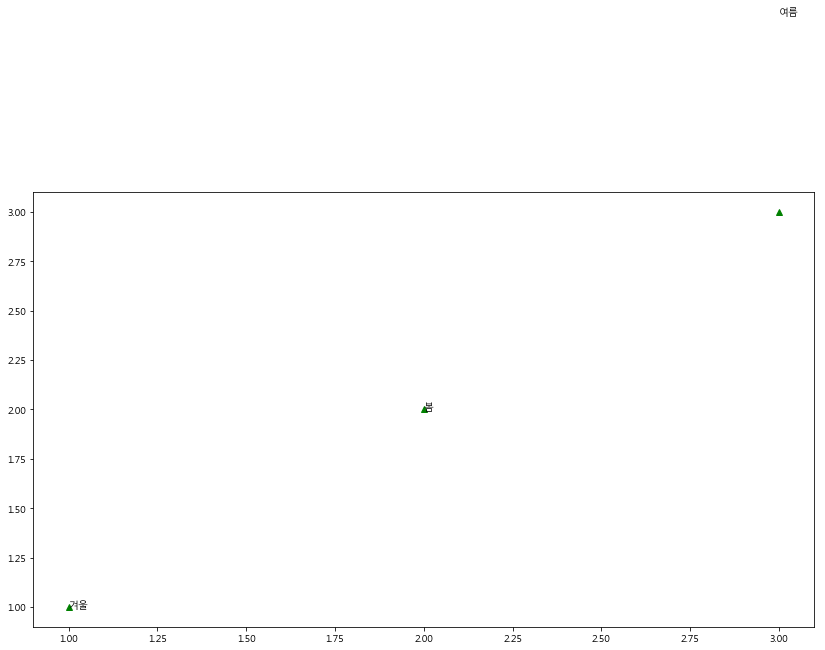

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.plot([1,2,3],[1,2,3],'g^')
plt.text(1,1,'겨울')
plt.text(2,2,'봄')
plt.text(3,4,'여름')
plt.show()

In [6]:
critics={
    '혜원': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'Salon825': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '강감찬': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '을지문덕': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '김유신': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '유성룡': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '이황': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '이이': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0}
        }

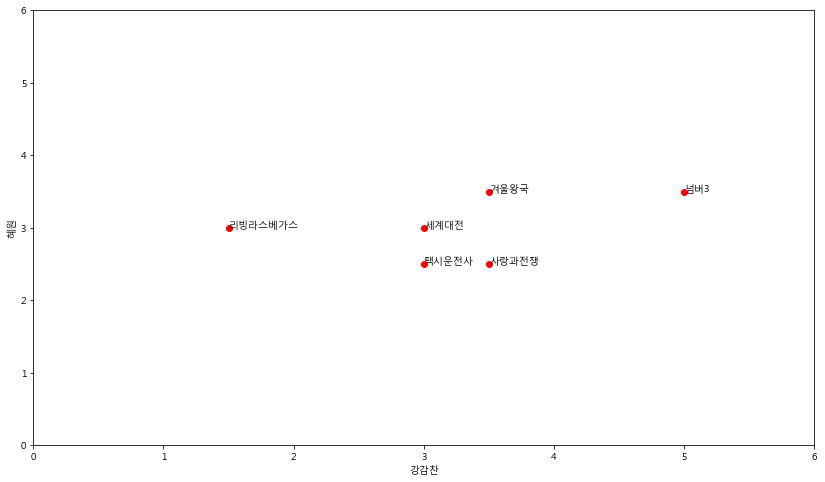

In [14]:
def drawGraph(data, name1, name2):
    plt.figure(figsize=(14,8))
    li=[]
    li2=[]
    for i in critics[name1]: # i 는 영화제목
        if i in data[name2]: #같은 영화를 봤다면
#             print(i)
            li.append(data[name1][i])
            li2.append(data[name2][i])
            plt.text(data[name1][i],data[name2][i],i)
#         print li
#         print li2
    plt.plot(li,li2,'ro')
    plt.axis([0,6,0,6]) #축의 범위 0~6
    plt.xlabel(name1)
    plt.ylabel(name2)
drawGraph(critics,'강감찬', '혜원')

In [17]:
from math import sqrt
def sim_pearson(data,name1,name2):
    sumPowX=0# X 제곱의 합
    sumPowY=0# Y 제곱의 합
    sumX=0# X의 합
    sumY=0# Y의 합
    count=0# 영화의 개수(n)
    sumXY=0# X*Y의 합
    for i in data[name1]:
        if i in data[name2]: # 공통으로 본 영화의 평첨에 대한 상관계수를 구하고 싶다
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    return  (sumXY-((sumX*sumY)/count))/sqrt((sumPowX-(pow(sumX,2)/count))*(sumPowY-(pow(sumY,2)/count)))
            
sim_pearson(critics,'강감찬','혜원')

0.39605901719066977

[(0.39605901719066977, '혜원'), (0.21693045781865616, 'Salon825'), (0.20459830184114206, '을지문덕'), (0.31497039417435607, '김유신'), (0.3593134953348082, '유성룡'), (0.963795681875635, '이황'), (0.38124642583151164, '이이')]
[(0.20459830184114206, '을지문덕'), (0.21693045781865616, 'Salon825'), (0.31497039417435607, '김유신'), (0.3593134953348082, '유성룡'), (0.38124642583151164, '이이'), (0.39605901719066977, '혜원'), (0.963795681875635, '이황')]


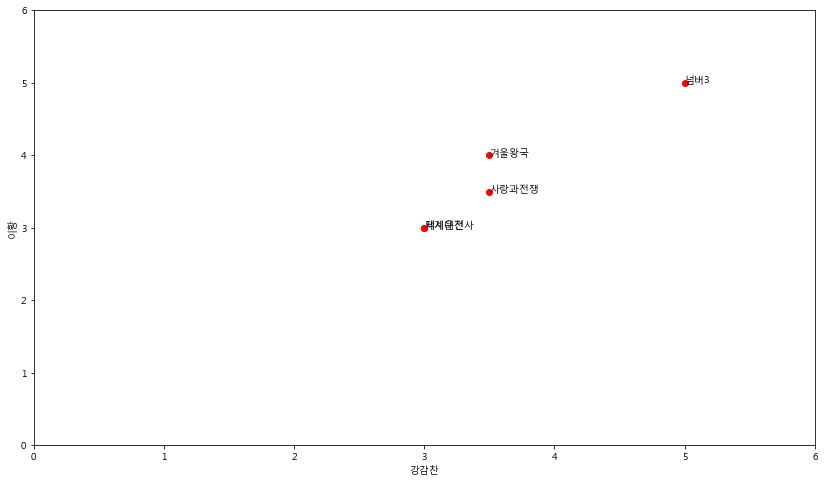

In [20]:
def top_match(data, name, index=3, sim_function=sim_pearson):
    res=[]
    for i in data:
        if name!=i:
            res.append((sim_function(data,name,i),i)) #튜플구조
            #print(name,"과",i,"와의 유사도: "sim_function(data,name,i))#혜원(조용필)과 을지문덕 간 유사도
    print(res)
    res.sort() #올림차순
    print(res) 
    res.reverse() #내림차순
    return res[:index]
top_match(critics, '강감찬', 5)
drawGraph(critics, '강감찬','이황')

#### 1)을지문덕과 가장 유사도가 높은사람 검색
#### 2)을지문덕이 안 본 영화에 대한 예상 평점을 구함
을지문덕이 안본 영화를 강감찬이 5점 평점 부여한 상황에서 유사도가 0.8이라면 5*0.8점을 부여할 것으로 예상할 수 있음

In [21]:
top_match(critics, '을지문덕', 5)

[(0.40451991747794525, '혜원'), (0.5692099788303083, 'Salon825'), (0.20459830184114206, '강감찬'), (1.0, '김유신'), (0.13483997249264842, '유성룡'), (0.13483997249264842, '이황'), (-1.0, '이이')]
[(-1.0, '이이'), (0.13483997249264842, '유성룡'), (0.13483997249264842, '이황'), (0.20459830184114206, '강감찬'), (0.40451991747794525, '혜원'), (0.5692099788303083, 'Salon825'), (1.0, '김유신')]


[(1.0, '김유신'),
 (0.5692099788303083, 'Salon825'),
 (0.40451991747794525, '혜원'),
 (0.20459830184114206, '강감찬'),
 (0.13483997249264842, '이황')]